In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def process_lake_timeseries(file_path, agg_method='mean'):
    """
    Process lake time series data from quarterly to annual resolution.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    agg_method : str, optional
        Method to use for aggregation ('mean', 'sum', 'max', 'min')
        Default is 'mean'
        
    Returns:
    --------
    tuple
        (quarterly_df, annual_df) containing both the original quarterly 
        and aggregated annual dataframes
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Convert datetime column
    df['midcyc_datetime'] = pd.to_datetime(df['midcyc_datetime'])
    
    # Set datetime as index
    df = df.set_index('midcyc_datetime')
    
    # Create annual dataframe
    annual_df = df.resample('YE').agg(agg_method)
    
    # Reset index for both dataframes
    quarterly_df = df.reset_index()
    annual_df = annual_df.reset_index()
    
    return quarterly_df, annual_df

def plot_comparison(quarterly_df, annual_df, metric, figsize=(15, 10)):
    """
    Plot quarterly and annual data for comparison.
    
    Parameters:
    -----------
    quarterly_df : pandas.DataFrame
        DataFrame containing quarterly data
    annual_df : pandas.DataFrame
        DataFrame containing annual data
    metric : str
        Column name to plot
    figsize : tuple, optional
        Figure size (width, height)
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    # Plot quarterly data
    sns.lineplot(data=quarterly_df, x='midcyc_datetime', y=metric, ax=ax1)
    ax1.set_title(f'Quarterly {metric}')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot annual data
    sns.lineplot(data=annual_df, x='midcyc_datetime', y=metric, ax=ax2, 
                marker='o', markersize=8)
    ax2.set_title(f'Annual {metric} (aggregated)')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    return fig

/tmp/ipykernel_457/625472706.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_df = df.resample('Y').agg(agg_method)



Quarterly Data Summary:
           midcyc_datetime  evolving_outlines_area (m^2)  \
count                   55                  5.500000e+01   
mean   2017-05-17 15:27:00                  7.403143e+07   
min    2010-08-17 06:45:00                  0.000000e+00   
25%    2014-01-01 01:30:00                  4.870034e+07   
50%    2017-05-17 23:15:00                  7.676839e+07   
75%    2020-10-01 10:30:00                  1.004874e+08   
max    2024-02-16 03:45:00                  1.624396e+08   
std                    NaN                  3.723258e+07   

       evolving_outlines_dh (m)  evolving_outlines_region_dh (m)  \
count                 55.000000                        55.000000   
mean                  -0.002034                         0.065840   
min                   -2.064559                        -0.113809   
25%                   -0.809096                         0.032818   
50%                    0.362365                         0.067527   
75%                    0.7

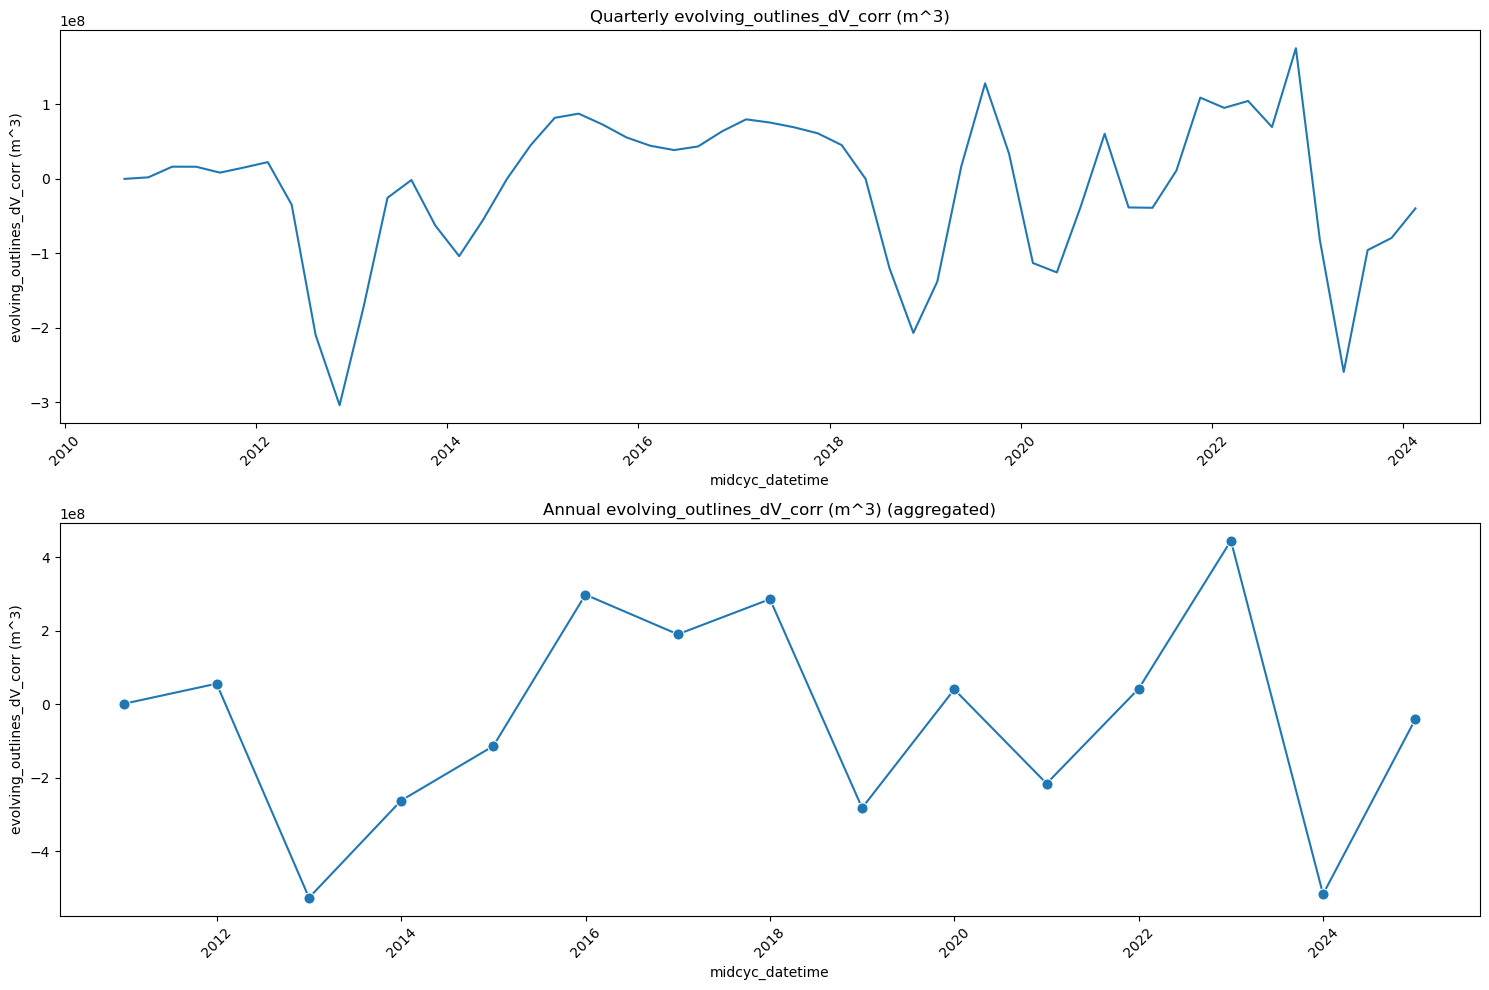

In [5]:
# Example usage
if __name__ == "__main__":
    lake_name = "MercerSubglacialLake"
    
    # File path
    file_path = f"/home/jovyan/1_evolving_lakes/Sauthoff-202X-evolving-lakes/output/geometric_calcs/evolving_outlines_geom_calc/{lake_name}.csv"
    
    # Process the data
    quarterly_df, annual_df = process_lake_timeseries(file_path, agg_method='sum')
    
    # Print summary statistics
    print("\nQuarterly Data Summary:")
    print(quarterly_df.describe())
    print("\nAnnual Data Summary:")
    print(annual_df.describe())
    
    # Example: Plot volume changes
    metric = 'evolving_outlines_dV_corr (m^3)'
    fig = plot_comparison(quarterly_df, annual_df, metric)
    plt.show()
    
    # Save to CSV if needed
    annual_df.to_csv(f"/home/jovyan/data/{lake_name}_annualized.csv", index=False)

/tmp/ipykernel_457/625472706.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_df = df.resample('Y').agg(agg_method)



Quarterly Data Summary:
           midcyc_datetime  evolving_outlines_area (m^2)  \
count                   55                  5.500000e+01   
mean   2017-05-17 15:27:00                  1.500144e+07   
min    2010-08-17 06:45:00                  0.000000e+00   
25%    2014-01-01 01:30:00                  0.000000e+00   
50%    2017-05-17 23:15:00                  0.000000e+00   
75%    2020-10-01 10:30:00                  2.362176e+07   
max    2024-02-16 03:45:00                  9.258725e+07   
std                    NaN                  2.703148e+07   

       evolving_outlines_dh (m)  evolving_outlines_region_dh (m)  \
count                 55.000000                        55.000000   
mean                   0.080766                         0.050895   
min                   -1.154444                        -0.079669   
25%                    0.000000                         0.019420   
50%                    0.000000                         0.054536   
75%                    0.1

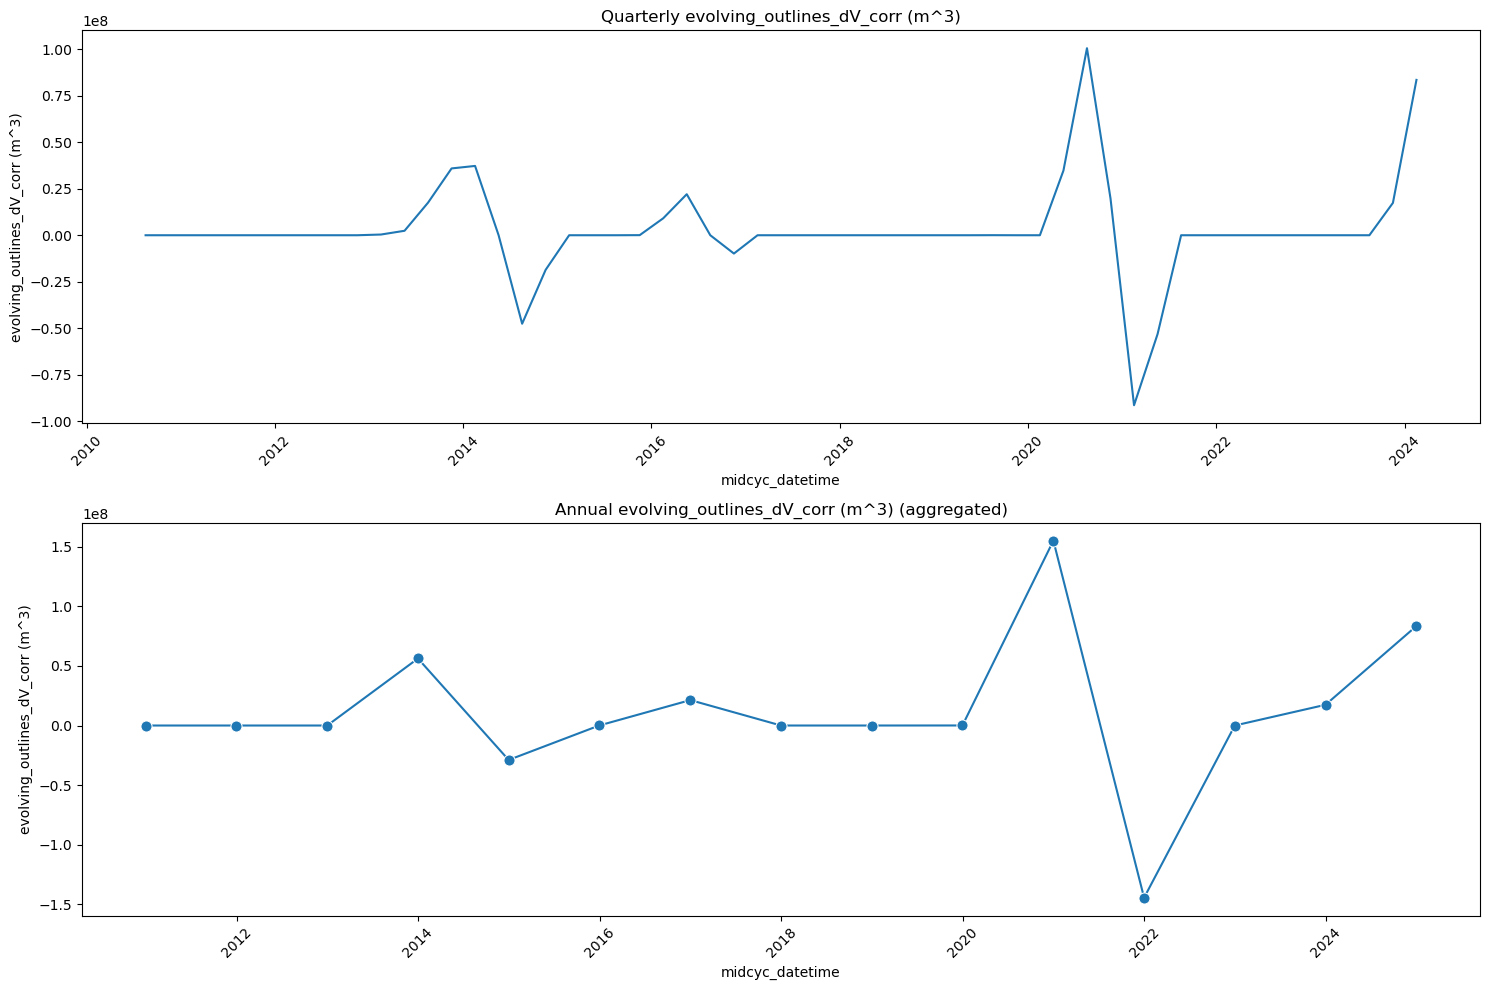

In [11]:
# Example usage
if __name__ == "__main__":
    lake_name = "WhillansSubglacialLake"
    
    # File path
    file_path = f"/home/jovyan/1_evolving_lakes/Sauthoff-202X-evolving-lakes/output/geometric_calcs/evolving_outlines_geom_calc/{lake_name}.csv"
    
    # Process the data
    quarterly_df, annual_df = process_lake_timeseries(file_path, agg_method='sum')
    
    # Print summary statistics
    print("\nQuarterly Data Summary:")
    print(quarterly_df.describe())
    print("\nAnnual Data Summary:")
    print(annual_df.describe())
    
    # Example: Plot volume changes
    metric = 'evolving_outlines_dV_corr (m^3)'
    fig = plot_comparison(quarterly_df, annual_df, metric)
    plt.show()
    
    # Save to CSV if needed
    annual_df.to_csv(f"/home/jovyan/data/{lake_name}_annualized.csv", index=False)

In [16]:
def copy_and_process_csv(lake_name):
    # Read the CSV file
    file_path = f"/home/jovyan/1_evolving_lakes/Sauthoff-202X-evolving-lakes/output/geometric_calcs/evolving_outlines_geom_calc/{lake_name}.csv"
    df = pd.read_csv(file_path)

    # Keep only the specified columns
    df = df[['midcyc_datetime', 'evolving_outlines_dV_corr (m^3)']]
    
    # Save the modified dataframe back to CSV
    output_filepath = f"/home/jovyan/data/{lake_name}.csv"
    df.to_csv(output_filepath, index=False)
    print(f"Processed file saved as: {output_filepath}")

# Process both files
lake_names = ['MercerSubglacialLake', 'WhillansSubglacialLake']
for lake_name in lake_names:
    try:
        copy_and_process_csv(lake_name)
    except Exception as e:
        print(f"Error processing {lake_name}: {str(e)}")

Processed file saved as: /home/jovyan/data/MercerSubglacialLake.csv
Processed file saved as: /home/jovyan/data/WhillansSubglacialLake.csv


In [13]:
def process_csv(filepath):
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Rename the column
    df = df.rename(columns={'midcyc_datetime': 'date'})
    
    # Keep only the specified columns
    df = df[['date', 'evolving_outlines_dV_corr (m^3)']]
    
    # Save the modified dataframe back to CSV
    output_filepath = filepath
    df.to_csv(output_filepath, index=False)
    print(f"Processed file saved as: {output_filepath}")

# Process both files
files = ['/home/jovyan/data/MercerSubglacialLake_annualized.csv', '/home/jovyan/data/WhillansSubglacialLake_annualized.csv']
for file in files:
    try:
        process_csv(file)
    except Exception as e:
        print(f"Error processing {file}: {str(e)}")

Processed file saved as: /home/jovyan/data/MercerSubglacialLake_annualized.csv
Processed file saved as: /home/jovyan/data/WhillansSubglacialLake_annualized.csv
